In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

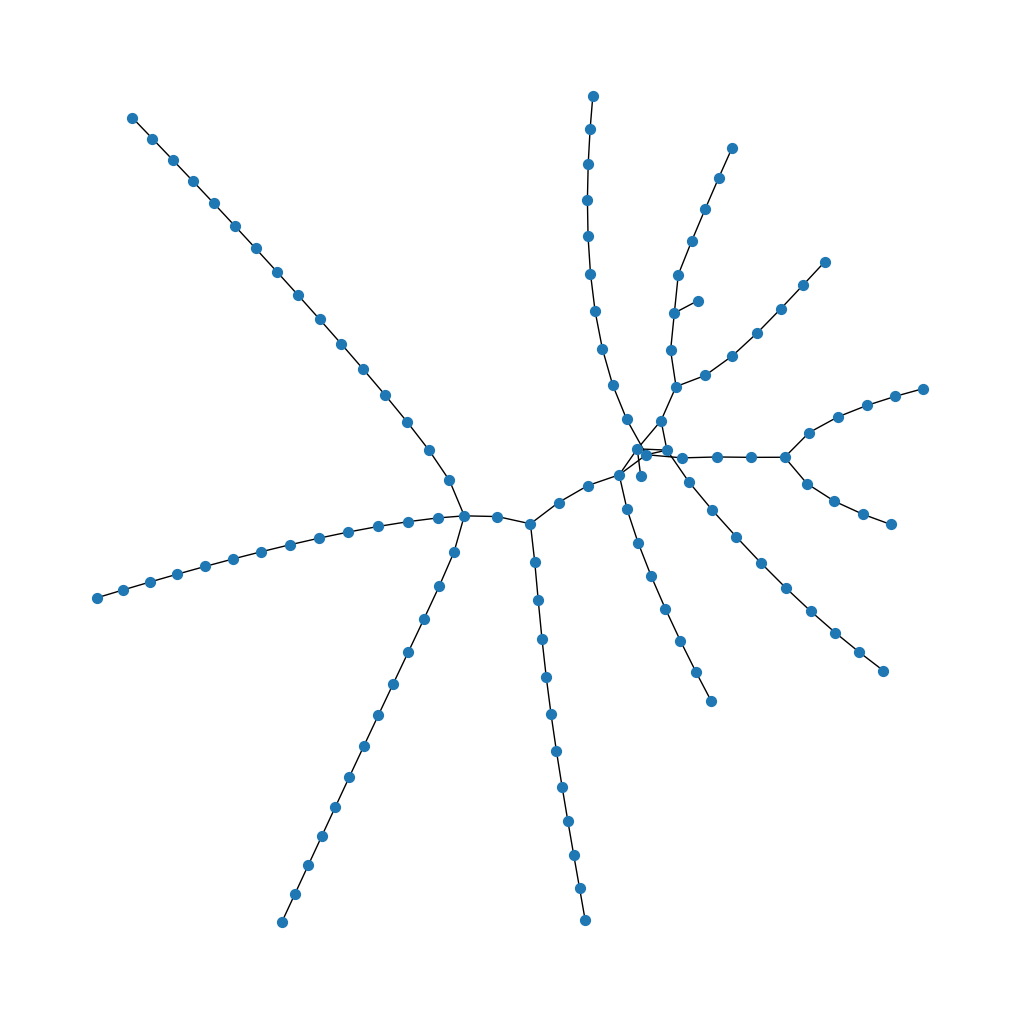

In [52]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        edges.add((stop_name, next_stop_name))
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw(network, layout, node_size=50)

In [53]:
NL = list(network)
NL

['Hawes Street',
 'Assembly',
 'Wollaston',
 'Waban',
 'Eliot',
 'Amory Street',
 'Aquarium',
 'Boston University Central',
 'Brigham Circle',
 'JFK/UMass',
 'Oak Grove',
 'Massachusetts Avenue',
 'Wonderland',
 'Magoun Square',
 'Quincy Adams',
 'Fairbanks Street',
 'Gilman Square',
 'Warren Street',
 'State',
 'Park Street',
 'Suffolk Downs',
 'Brookline Hills',
 'Summit Avenue',
 'Riverway',
 'Savin Hill',
 'Community College',
 'Reservoir',
 'Woodland',
 'Andrew',
 'Northeastern University',
 'Malden Center',
 'Forest Hills',
 'Central',
 "Packard's Corner",
 'South Street',
 'Allston Street',
 'Copley',
 'East Somerville',
 'Saint Paul Street',
 'Quincy Center',
 'Englewood Avenue',
 'Lechmere',
 'Wellington',
 'Stony Brook',
 'Babcock Street',
 'Ball Square',
 'Arlington',
 'Tufts Medical Center',
 'Longwood Medical Area',
 'Science Park/West End',
 'Kenmore',
 'Jackson Square',
 'Back Bay',
 'Davis',
 'Boston University East',
 'Sutherland Road',
 'Kent Street',
 'Newton Highlan

In [54]:
def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []

    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))

    return NL_indices


def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []

    for i in index_list:
        station_list.append(NL[i])

    return station_list


def rlp(f, adjacency, epsilon, max_l=3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))

    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l) * f @ np.linalg.matrix_power(adjacency, l + 1)
        s_rlp = np.add(s_rlp, summation_iteration)

    return s_rlp


def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """

    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list

    indices = list(np.nonzero(array)[1])

    values = []
    for i in indices:
        values.append(array[0][i])

    stations = index_to_station_id(indices)

    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key=lambda x: x[1])

    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])

    return station_sorted


In [55]:


# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
print(f"TD Garden - North Station, index {NL.index('North Station')}")
print(f"Big Night Live - North Station, index {NL.index('North Station')}")
print(f"Fenway Park - Kenmore, index {NL.index('Kenmore')}")
print(f"Harvard Stadium - Harvard Ave, index {NL.index('Harvard')}")

Destination_station_ids = ['North Station', 'Kenmore', 'Harvard']

TD Garden - North Station, index 111
Big Night Live - North Station, index 111
Fenway Park - Kenmore, index 50
Harvard Stadium - Harvard Ave, index 117


In [56]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.9


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

('Assembly',
 'Aquarium',
 'Boston University Central',
 'Park Street',
 'East Somerville',
 'Arlington',
 'Kent Street',
 'Bowdoin',
 'Brookline Village',
 'Union Square',
 'Downtown Crossing',
 'Charles/MGH',
 'Alewife',
 'Prudential',
 'Hawes Street',
 'Copley',
 'Lechmere',
 'Davis',
 'Boston University East',
 'Sullivan Square',
 'Longwood',
 'Kendall/MIT',
 'State',
 'Government Center',
 'Harvard',
 'North Station',
 'Central',
 'Porter',
 'Kenmore',
 'Community College',
 'Science Park/West End',
 'Hynes Convention Center',
 'Haymarket',
 "Saint Mary's Street",
 'Fenway',
 'Blandford Street')

# Ok Now Onto the New Stuff

Let's figure out how to get delay data working...

In [57]:
import json

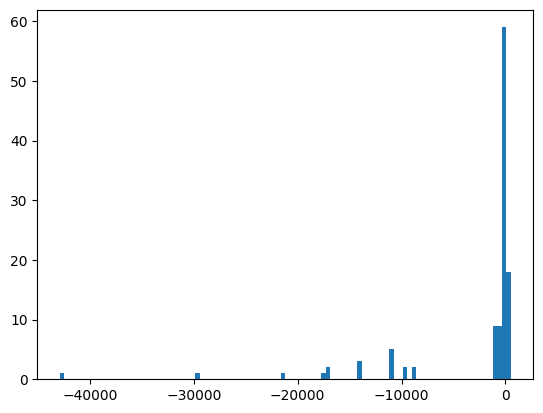

In [58]:
delays_file = open("../delay_data/named_rapid_transit_delays.json", 'r')
delays_json = delays_file.read()
delays_file.close()

delays = json.loads(delays_json)
fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

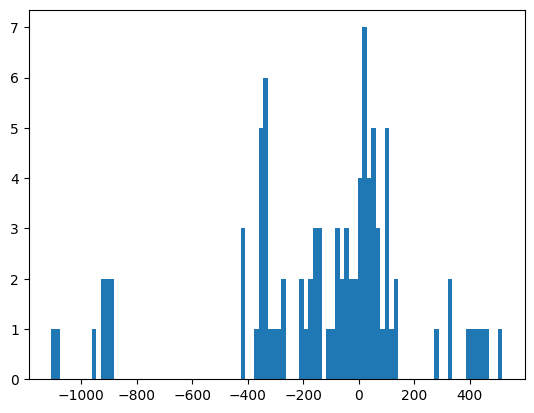

In [59]:
# remove outliers
delays = dict((s, d) for s, d in delays.items() if d > -5000)

fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

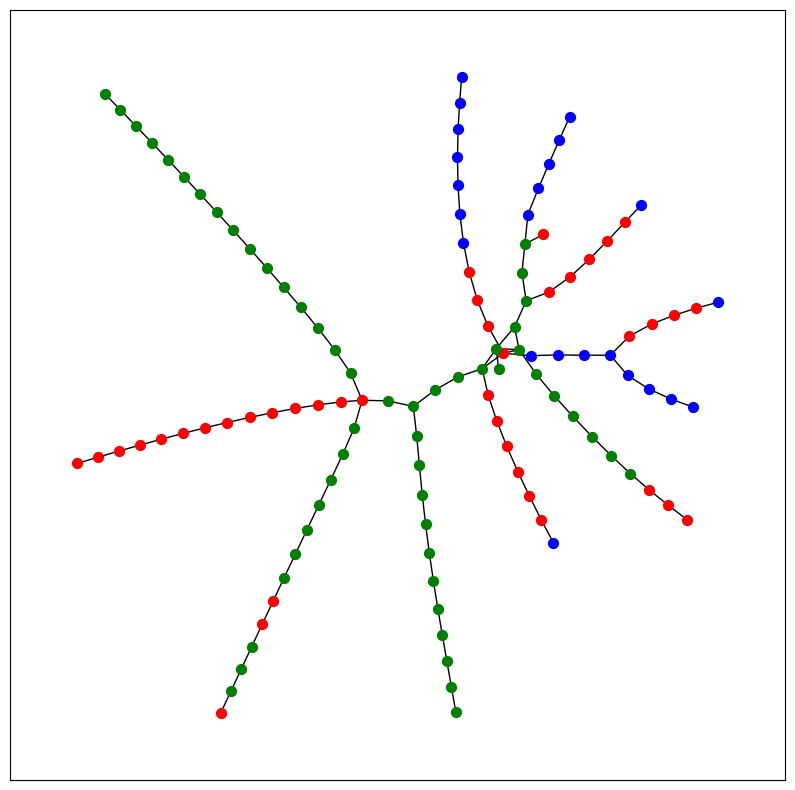

In [60]:
nx.set_node_attributes(network, delays, "avg_delay")

# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
nonnegative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay >= 0]
negative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay < 0]
remaining_nodes = list(set(network.nodes()) - set(nonnegative_delay_nodes) - set(negative_delay_nodes))

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=nonnegative_delay_nodes, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=negative_delay_nodes, node_color='green', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

## Weighted edges

In [61]:
network.edges()

EdgeView([('Hawes Street', "Saint Mary's Street"), ('Hawes Street', 'Kent Street'), ('Assembly', 'Wellington'), ('Assembly', 'Sullivan Square'), ('Wollaston', 'North Quincy'), ('Wollaston', 'Quincy Center'), ('Waban', 'Woodland'), ('Waban', 'Eliot'), ('Eliot', 'Newton Highlands'), ('Amory Street', 'Babcock Street'), ('Amory Street', 'Boston University Central'), ('Aquarium', 'Maverick'), ('Aquarium', 'State'), ('Boston University Central', 'Boston University East'), ('Brigham Circle', 'Fenwood Road'), ('Brigham Circle', 'Longwood Medical Area'), ('JFK/UMass', 'Savin Hill'), ('JFK/UMass', 'North Quincy'), ('JFK/UMass', 'Andrew'), ('Oak Grove', 'Malden Center'), ('Massachusetts Avenue', 'Ruggles'), ('Massachusetts Avenue', 'Back Bay'), ('Wonderland', 'Revere Beach'), ('Magoun Square', 'Gilman Square'), ('Magoun Square', 'Ball Square'), ('Quincy Adams', 'Braintree'), ('Quincy Adams', 'Quincy Center'), ('Fairbanks Street', 'Washington Square'), ('Fairbanks Street', 'Brandon Hall'), ('Gilma

In [62]:
dict_of_delay = nx.get_node_attributes(network, "avg_delay")

def get_delay(node_name, attribute_dict = dict_of_delay):
    try:
      attribute_val = attribute_dict[node_name]
    except:
      attribute_val = 0
    return attribute_val

In [63]:
get_delay('Assembly', dict_of_delay)

70.1666666666667

In [64]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

network2 = nx.Graph()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        w = 0.5*(get_delay(stop_name, dict_of_delay) + get_delay(next_stop_name, dict_of_delay))
        if w < 0:
            w=0
        network2.add_edge(stop_name, next_stop_name, weight = w)   
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)


network2.add_nodes_from(stations)


fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network2)
nx.draw(network2, layout, node_size=50)

ValueError: ('Contradictory paths found:', 'negative weights?')

<Figure size 1000x1000 with 0 Axes>

In [49]:
network2.edges(data=True)

EdgeDataView([('Alewife', 'Davis', {'weight': 0.0}), ('Davis', 'Porter', {'weight': 0.0}), ('Porter', 'Harvard', {'weight': 0.0}), ('Harvard', 'Central', {'weight': 0.0}), ('Central', 'Kendall/MIT', {'weight': 0.0}), ('Kendall/MIT', 'Charles/MGH', {'weight': 0.0}), ('Charles/MGH', 'Park Street', {'weight': 0.0}), ('Park Street', 'Downtown Crossing', {'weight': 0.0}), ('Park Street', 'Government Center', {'weight': 0.0}), ('Park Street', 'Boylston', {'weight': 0.0}), ('Downtown Crossing', 'South Station', {'weight': 0.0}), ('Downtown Crossing', 'State', {'weight': 0.0}), ('Downtown Crossing', 'Chinatown', {'weight': 0.0}), ('South Station', 'Broadway', {'weight': 0.0}), ('Broadway', 'Andrew', {'weight': 0.0}), ('Andrew', 'JFK/UMass', {'weight': 0.0}), ('JFK/UMass', 'North Quincy', {'weight': 0.0}), ('JFK/UMass', 'Savin Hill', {'weight': 0.0}), ('North Quincy', 'Wollaston', {'weight': 0.0}), ('Wollaston', 'Quincy Center', {'weight': 0.0}), ('Quincy Center', 'Quincy Adams', {'weight': 0.0